In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

###**Задание 1**

---
###**Task 1**

**Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?**  
- Построить точечный график  
- Рассчитать коэффициенты корреляции Пирсона и Спирмена  
- Построить модель линейной регрессии  
- Рассчитать коэффициент детерминации  
- Вывести график остатков

---
**Answer the question: Is there a relationship between water hardness and average annual mortality?**  
- Build a dot graph  
- Calculate Pearson and Spearman correlation coefficients  
- Build a linear regression model  
- Calculate the coefficient of determination  
- Display a graph of balances

In [ ]:
# Загрузим только нужные столбцы и переименуем их:
# -----------------------------------------------------------------------------
# Load only the necessary columns and rename them:

df = pd.read_csv('/content/drive/MyDrive/Файлы для домашних заданий/water.csv',
                 header=0,
                 usecols=[1, 2, 3, 4],
                 names=['Положение', 'Город', 'Смертность', 'Жёсткость']
                 )
df.head()

,Положение,Город,Смертность,Жёсткость
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Положение   61 non-null     object
 1   Город       61 non-null     object
 2   Смертность  61 non-null     int64 
 3   Жёсткость   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


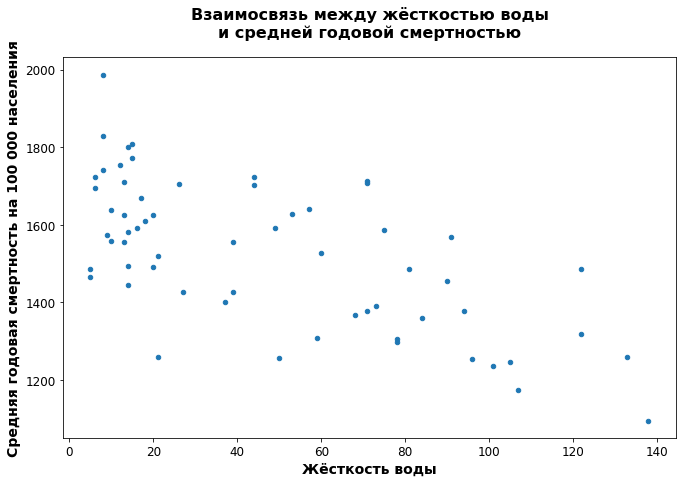

In [ ]:
# Построим точечный график взаимосвязи между жёсткостью воды и средней
# годовой смертностью:
# -----------------------------------------------------------------------------
# Let's plot a dot graph of the relationship between water hardness and average
# annual mortality:

df.plot(kind='scatter', x='Жёсткость', y='Смертность')
plt.title('Взаимосвязь между жёсткостью воды' '\n'
          'и средней годовой смертностью',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Жёсткость воды', fontsize=14, fontweight='bold')
plt.ylabel('Средняя годовая смертность на 100 000 населения',
           fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

*Из данного графика мы не видим четкой зависимости смертности от жёсткости воды.  
С большой натяжкой можно предположить, что в городах, где пьют более мягкую  
воду, средняя годовая смертность несколько выше. Т.е. как бы присутствует  
незначительная обратная связь. Хотя повышенная смертность может быть  
обусловлена совершенно другими факторами, которые нам не известны  
(например, загрязнение воздуха в городах).*


---
*From this graph, we do not see a clear dependence of mortality on water hardness.  
It is a stretch to assume that in cities where they drink softer  
water, the average annual mortality is slightly higher. I.e., as if there  
is a slight feedback. Although increased mortality may be it is caused by  
completely different factors that are unknown to us (for example, urban air  
pollution).*



In [ ]:
# Рассчитаем коэффициент корреляции Пирсона:
# -----------------------------------------------------------------------------
# Calculate the Pearson correlation coefficient:

df[['Жёсткость', 'Смертность']].corr()

,Жёсткость,Смертность
Жёсткость,1.000000,-0.654849
Смертность,-0.654849,1.000000


*Данный коэффициент показывает, что между жесткостью воды и средней годовой  
смертностью все же существует умеренная отрицательная связь. Данная связь совсем  
не означает, что мягкая вода является причиной повышенной сметности.*

---
*This coefficient shows that there is still a moderate negative relationship  
between water hardness and average annual mortality. This connection is  
completely it does not mean that soft water is the cause of increased mortality.*

In [ ]:
# Рассчитаем коэффициент корреляции Спирмана:
# -----------------------------------------------------------------------------
# Calculate the Spearman correlation coefficient:

df[['Жёсткость', 'Смертность']].corr(method='spearman')

,Жёсткость,Смертность
Жёсткость,1.000000,-0.631665
Смертность,-0.631665,1.000000


*Данный коэффициент также показывает наличие умеренной отрицательной  
корреляционной зависимости между жёсткостью воды и средней годовой  
cмертностью. Т.е. можно предположить, что в городах, где пьют более мягкую воду  
средняя годовая смертность несколько выше. Хотя это совершенно не означает, что  
мягкая вода является причиной повышенной смертности. Чтобы говорить, что  
существует именно такая взаимосвязь, мы должны знать и другие параметры,  
которые могут  влиять на среднюю годовую смертность. Причем эти прочие   
параметры должны быть равны между собой.*

---
*This coefficient also shows the presence of a moderate negative correlation  
between water hardness and average annual mortality. I.e., it can be assumed  
that in cities where they drink softer water the average annual mortality is  
slightly higher. Although this does not mean at all that soft water is the  
cause of increased mortality. To say that there is just such a relationship, we  
need to know other parameters that can affect the average annual mortality.  
Moreover, these other parameters should be equal to each other.*

In [ ]:
# Сформируем признаки и целевую переменную:
# -----------------------------------------------------------------------------
# Let's form the attributes and the target variable:

X = df[['Жёсткость']]
Y = df['Смертность']

In [ ]:
# Разделим данные на выборку для обучения и проверки.
# В следствие того, что у нас небольшой объем данных, размер тестовой выбоки
# ограничим 20 %.
# -----------------------------------------------------------------------------
# Divide the data into a sample for training and verification.
# Due to the fact that we have a small amount of data, the size of the test
# samplelet's limit it to 20%.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,
                                                    random_state=42)

In [ ]:
# Создадим и обучим модель линейной регрессии:
# -----------------------------------------------------------------------------
# Create and train a linear regression model:

model = LinearRegression()
model.fit(X_train, Y_train)

In [ ]:
# Посмотрим прогнозные данные:
# -----------------------------------------------------------------------------
# Let's look at the forecast data:

Y_pred = model.predict(X_test)
print(Y_pred.round())

[1339. 1651. 1638. 1539. 1428. 1618. 1247. 1438. 1615. 1664. 1490. 1418.
 1556.]


In [ ]:
# Рассчитаем коэффициент детерминации:
# -----------------------------------------------------------------------------
# Calculate the coefficient of determination:

model.score(X_test, Y_test)

0.5099679408034544

*Мы видим, что коэффициэнт детерминации подтверждает умеренную связь между  
жёсткостью воды и средней годовой смертностью населения. Можем сказать, что  
наша модель приемлема, хотя 50 % - это нижний порог определения точности модели.*

---
*We see that the coefficient of determination confirms a moderate relationship  
between water hardness and the average annual mortality of the population. We  
can say that our model is acceptable, although 50% is the lower threshold for  
determining the accuracy of the model.*

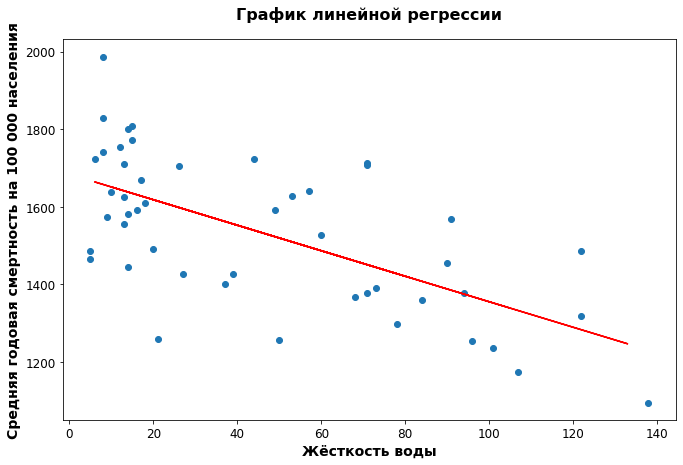

In [ ]:
# Построим график нашей модели линейной регрессии:
# -----------------------------------------------------------------------------
# Let's plot our linear regression model:

plt.scatter(X_train, Y_train)
plt.plot(X_test, Y_pred, c='r')
plt.title('График линейной регрессии', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Жёсткость воды', fontsize=14, fontweight='bold')
plt.ylabel('Средняя годовая смертность на 100 000 населения',
           fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

*По графику можно сказать, что наша модель линейной регрессии подходит  
для используемого набора данных.*

---
*According to the graph, we can say that our linear regression model is suitable  
for the data set used.*

In [ ]:
# Найдем остатки:
# -----------------------------------------------------------------------------
# Find the remnants:

residuals = Y_test - Y_pred

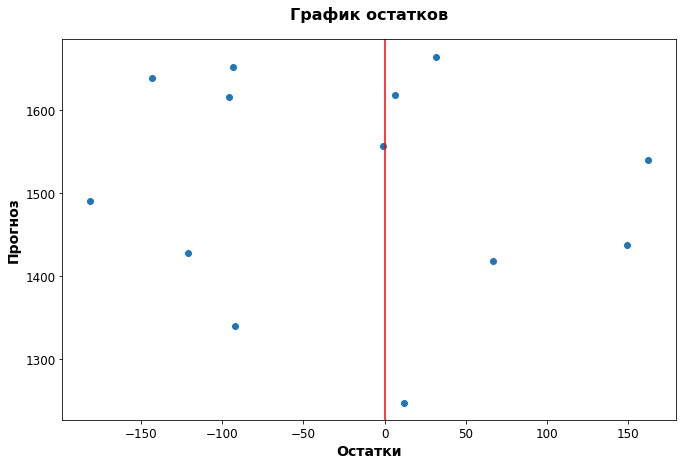

In [ ]:
# Построим график остатков:
# -----------------------------------------------------------------------------
# Let's plot the residuals:

plt.scatter(residuals, Y_pred)
plt.axvline(x = 0, c='r', linestyle = '-')
plt.title('График остатков', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Остатки',
           fontsize=14, fontweight='bold')
plt.ylabel('Прогноз',
           fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

*Мы видим, что наши остатки ведут себя достаточно хаотично, в них нет  
систематической сотавляющей и каких-либо закономерностей. На основании этого  
можно сказать, что наша модель подобрана достаточно правильно.*

---
*We see that our remnants behave quite chaotically, there is no systematic  
component in them and there are no patterns. Based on this we can say that our  
model is selected quite correctly.*

###**Задание 2**

---
###**Task 2**

**Ответить на вопрос: сохраняется ли аналогичная зависимость для  
северных и южных городов по отдельности?**  
- Разделить данные на 2 группы  
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

---
**Answer the question: is there a similar dependence for northern and southern  
cities separately?**  
- Divide the data into 2 groups  
- Repeat the same steps from point 1 for each group separately

In [ ]:
# Разделим данные на южные города:
# -----------------------------------------------------------------------------
# Divide the data into southern cities:

df_south = df.loc[df['Положение'] == 'South']
df_south.head()

,Положение,Город,Смертность,Жёсткость
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


In [ ]:
# и северные города:
# -----------------------------------------------------------------------------
# and northern cities:

df_north = df.loc[df['Положение'] == 'North']
df_north.head()

,Положение,Город,Смертность,Жёсткость
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


<i>**Проведем описанный выше анализ для каждой группы городов. Для наглядности  
шаги будем выполнять попарно.**</i>

---
<i>**We will carry out the analysis described above for each group of cities. For  
clarity, we will perform the steps in pairs.**</i>

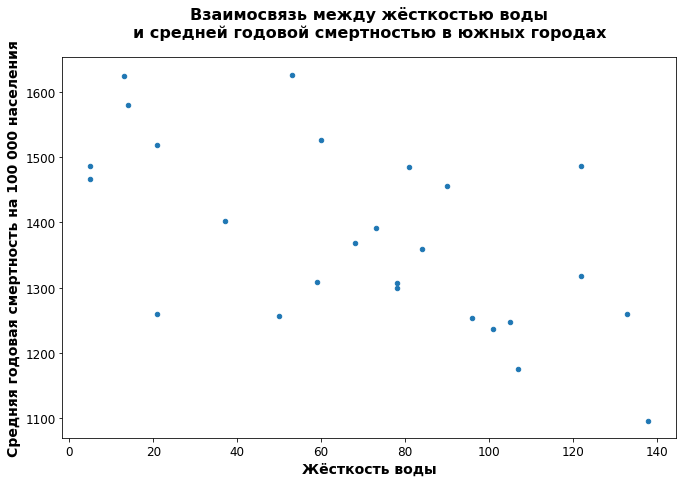

In [ ]:
# Построим точечный график взаимосвязи между жёсткостью воды и средней
# годовой смертностью для южных городов:
# -----------------------------------------------------------------------------
# Let's plot a dot graph of the relationship between water hardness and average
# annual mortality rate for southern cities:

df_south.plot(kind='scatter', x='Жёсткость', y='Смертность')
plt.title('Взаимосвязь между жёсткостью воды' '\n'
          'и средней годовой смертностью в южных городах',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Жёсткость воды', fontsize=14, fontweight='bold')
plt.ylabel('Средняя годовая смертность на 100 000 населения',
           fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

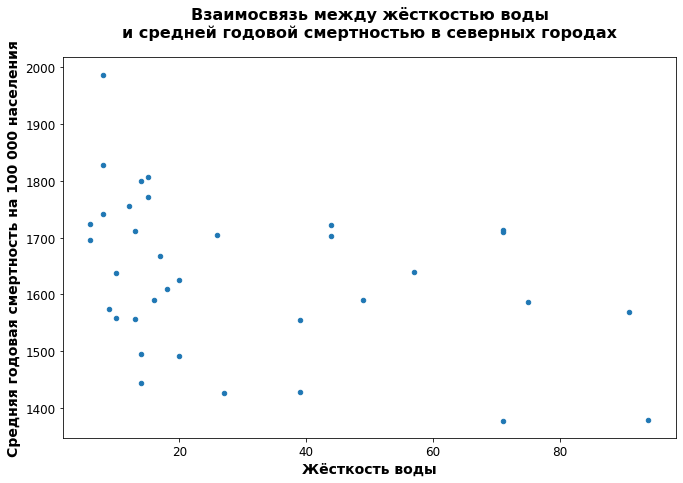

In [ ]:
# и северных городов:
# -----------------------------------------------------------------------------
# and northern cities:

df_north.plot(kind='scatter', x='Жёсткость', y='Смертность')
plt.title('Взаимосвязь между жёсткостью воды' '\n'
          'и средней годовой смертностью в северных городах',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Жёсткость воды', fontsize=14, fontweight='bold')
plt.ylabel('Средняя годовая смертность на 100 000 населения',
           fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

*Из данных графиков мы видим, что в группе северных городов связь между данными  
более схожа с общим графиком. График отражает незначительную обратную связь.  
По группе южных городов практически невозможно говорить о какой-либо связи между  
показателями.*

---
*From these graphs, we see that in the group of northern cities, the  
relationship between the data it is more similar to the general schedule. The  
graph reflects little feedback. For a group of southern cities, it is almost  
impossible to talk about any connection between indicators.*

In [ ]:
# Рассчитаем коэффициент корреляции Пирсона для южных городов:
# -----------------------------------------------------------------------------
# Calculate the Pearson correlation coefficient for southern cities:

df_south[['Жёсткость', 'Смертность']].corr()

,Жёсткость,Смертность
Жёсткость,1.000000,-0.602153
Смертность,-0.602153,1.000000


In [ ]:
# и северных городов:
# -----------------------------------------------------------------------------
# and northern cities:

df_north[['Жёсткость', 'Смертность']].corr()

,Жёсткость,Смертность
Жёсткость,1.000000,-0.368598
Смертность,-0.368598,1.000000


*Данные коэффициенты показывают нам иную картину, чем графики. Мы видим, что  
в южных городах как бы  обратная связь между показателями более сильная (умеренная),  
и более схожа с общими данными, чем в северных (слабая). Возможно, это обусловлено  
большим количеством выбросов в данных по южным городам.*

---
*These coefficients show us a different picture than the graphs. We see that in  
southern cities, as it were, the feedback between the indicators is stronger(moderate),  
and more similar to the general data than in northern cities (weak).  
Perhaps this is due to the large number of outliers in the data for southern cities.*

In [ ]:
# Рассчитаем коэффициент корреляции Спирмана для южных городов:
# -----------------------------------------------------------------------------
# Calculate the Spearman correlation coefficient for southern cities:

df_south[['Жёсткость', 'Смертность']].corr(method='spearman')

,Жёсткость,Смертность
Жёсткость,1.000000,-0.595723
Смертность,-0.595723,1.000000


In [ ]:
# и северных городов:
# -----------------------------------------------------------------------------
# and northern cities:

df_north[['Жёсткость', 'Смертность']].corr(method='spearman')

,Жёсткость,Смертность
Жёсткость,1.000000,-0.404208
Смертность,-0.404208,1.000000


*Коэффициенты показывают похожую связь, описанную выше.*

---
*The coefficients show a similar relationship described above.*

In [ ]:
# Сформируем признаки и целевую переменную по южным городам:
# -----------------------------------------------------------------------------
# Let's form signs and target variable for southern cities:

X_south = df_south[['Жёсткость']]
Y_south = df_south['Смертность']

In [ ]:
# и северным городам:
# -----------------------------------------------------------------------------
# and northern cities:

X_north = df_north[['Жёсткость']]
Y_north = df_north['Смертность']

In [ ]:
# Разделим данные на выборку для обучения и проверки по южным городам:
# -----------------------------------------------------------------------------
# We will divide the data into a sample for training and verification by
# southern cities:

X_south_train, X_south_test, Y_south_train, Y_south_test = train_test_split(
    X_south, Y_south, test_size=0.20,
                     random_state=42
                     )

In [ ]:
# и северным городам:
# -----------------------------------------------------------------------------
# and northern cities:

X_north_train, X_north_test, Y_north_train, Y_north_test = train_test_split(
    X_north, Y_north, test_size=0.20,
                     random_state=42
                     )

In [ ]:
# Создадим и обучим модель линейной регрессии для южных городов:
# ----------------------------------------------------------------------------
# Create and train a linear regression model for southern cities:

model_south = LinearRegression()
model_south.fit(X_south_train, Y_south_train)

In [ ]:
# и северных городов:
# -----------------------------------------------------------------------------
# and northern cities:

model_north = LinearRegression()
model_north.fit(X_north_train, Y_north_train)

In [ ]:
# Посмотрим прогнозные данные для южных городов:
# -----------------------------------------------------------------------------
# Let's look at the forecast data for southern cities:

Y_south_pred = model_south.predict(X_south_test)
print(Y_south_pred.round())

[1220. 1580. 1273. 1220. 1482. 1531.]


In [ ]:
# и северных городов:
# -----------------------------------------------------------------------------
# and northern cities:

Y_north_pred = model_north.predict(X_north_test)
print(Y_north_pred.round())

[1677. 1675. 1663. 1681. 1659. 1535. 1596.]


*Как видим прогнозные данные отличаются значительно.*

---
*As we can see, the forecast data differ significantly.*

In [ ]:
# Рассчитаем коэффициент детерминации для южных городов:
# -----------------------------------------------------------------------------
# Calculate the coefficient of determination for southern cities:

model_south.score(X_south_test, Y_south_test)

-1.9300174406554644

In [ ]:
# и северных городов:
# -----------------------------------------------------------------------------
# and northern cities:

model_north.score(X_north_test, Y_north_test)

-0.18101539518829401

*В обоих случаях мы получили отрицательный коэффициент детерминации. Это говорит  
о том, что обе наши модели не работают. Возможно, это обусловлено очень малой  
выборкой данных. Построение графиков остатков вряд ли меет смысл, но мы посмотрим  
на них.*

---
*In both cases, we obtained a negative coefficient of determination. This  
suggests that both of our models are not working. Perhaps this is due to a very  
small by sampling data. Plotting the residuals hardly makes sense, but we'll  
see on them.*

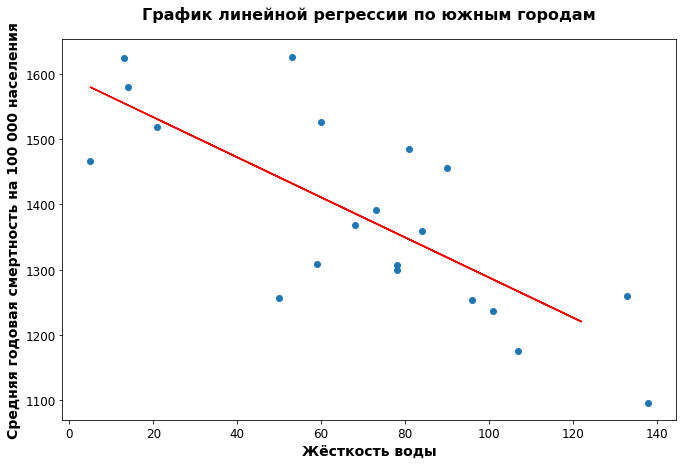

In [ ]:
# Построим график модели линейной регрессии по южным городам:
# -----------------------------------------------------------------------------
# Let's plot a linear regression model for southern cities:

plt.scatter(X_south_train, Y_south_train)
plt.plot(X_south_test, Y_south_pred, c='r')
plt.title('График линейной регрессии по южным городам',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Жёсткость воды', fontsize=14, fontweight='bold')
plt.ylabel('Средняя годовая смертность на 100 000 населения',
           fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

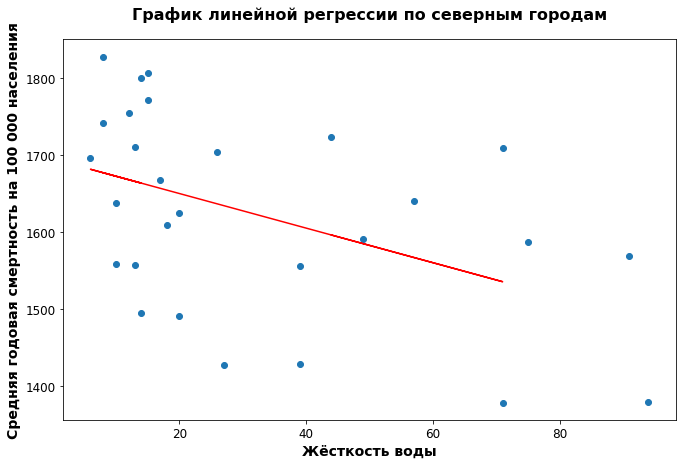

In [ ]:
# и по северным городам:
# -----------------------------------------------------------------------------
# and the northern cities:

plt.scatter(X_north_train, Y_north_train)
plt.plot(X_north_test, Y_north_pred, c='r')
plt.title('График линейной регрессии по северным городам',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Жёсткость воды', fontsize=14, fontweight='bold')
plt.ylabel('Средняя годовая смертность на 100 000 населения',
           fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Найдем остатки по южным городам:
# -----------------------------------------------------------------------------
# We will find the remnants of the southern cities:

residuals_south = Y_south_test - Y_south_pred

In [ ]:
# и по северным городам:
# -----------------------------------------------------------------------------
# and the northern cities:

residuals_north = Y_north_test - Y_north_pred

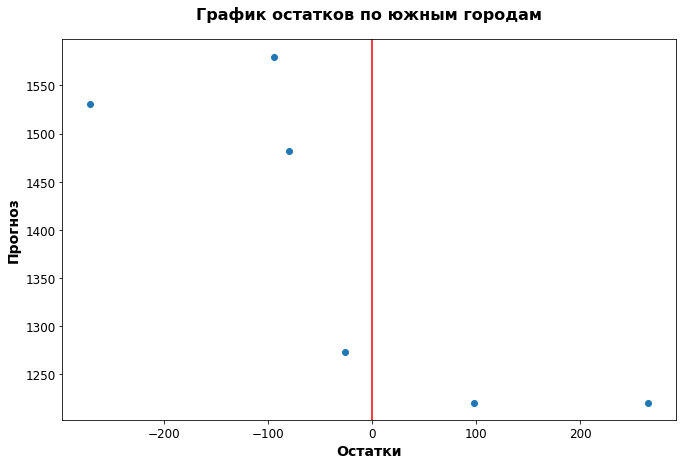

In [ ]:
# Построим график остатков по южным городам:
# -----------------------------------------------------------------------------
# Let's build a graph of balances for southern cities:

plt.scatter(residuals_south, Y_south_pred)
plt.axvline(x = 0, c='r', linestyle = '-')
plt.title('График остатков по южным городам',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Остатки',
           fontsize=14, fontweight='bold')
plt.ylabel('Прогноз',
           fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

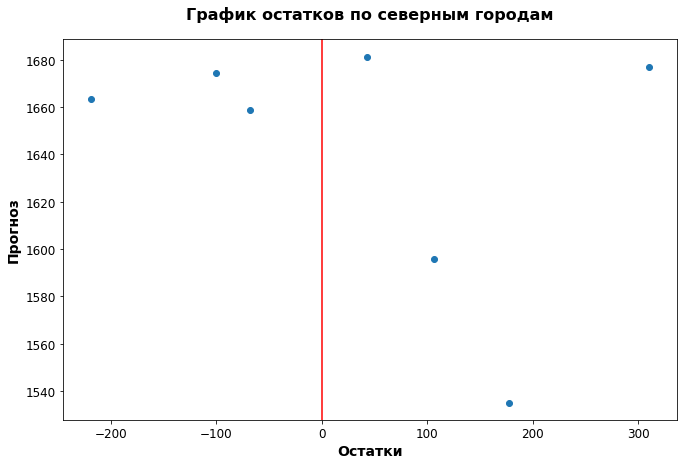

In [ ]:
# и по северным городам:
# -----------------------------------------------------------------------------
# and the northern cities:

plt.scatter(residuals_north, Y_north_pred)
plt.axvline(x = 0, c='r', linestyle = '-')
plt.title('График остатков по северным городам',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Остатки',
           fontsize=14, fontweight='bold')
plt.ylabel('Прогноз',
           fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

*На обоих графиках мы видим резкие выбросы. Это подтверждает, что модели  
подобраны не правильно.* <i>**Отвечая на вопрос задания мы можем сказать, что  
связь в отдельности по южным и северным городам отличается от общей  
выборки. Вероятно, это связано с очень малыми размерами выборок.**</i>

---
*We see sharp outliers on both charts. This confirms that the models are  
selected incorrectly.* <i>**Answering the question of the task, we can say that  
the connection separately for the southern and northern cities differs from the  
general one selections. This is probably due to the very small sample sizes.**</i>